In [99]:
import pandas as pd
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from matplotlib import pyplot as plt
import seaborn as sns

In [100]:
train = pd.read_csv(r"C:/Hogwarts/advanced_analytics/Datasets/train_v9.csv")

In [101]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [102]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [103]:
len(train['Item_Type'].unique())


16

In [104]:
train_ols = ols('Item_Outlet_Sales ~ Item_Type', data = train).fit()

In [105]:
table = anova_lm(train_ols, typ = 2) #type 2 layout in syllabi
print(table)

                 sum_sq      df         F    PR(>F)
Item_Type  1.176182e+08    15.0  2.700653  0.000388
Residual   2.469965e+10  8507.0       NaN       NaN


## Does Item Type influence the item sales?

### PR = 0.00388, so rejecting Ho as it is < 0.05

In [106]:
compare = pairwise_tukeyhsd(train['Item_Outlet_Sales'],
                            train['Item_Type'], alpha = 0.05)

C:\Users\admin\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


In [107]:
dd = pd.DataFrame(compare._results_table.data)
dd

,0,1,2,3,4,5,6
0,group1,group2,meandiff,p-adj,lower,upper,reject
1,Baking Goods,Breads,251.161,0.8352,-182.986,685.3081,False
2,Baking Goods,Breakfast,158.8374,0.9999,-443.3506,761.0255,False
3,Baking Goods,Canned,272.2237,0.2268,-52.0722,596.5196,False
4,Baking Goods,Dairy,279.5714,0.1728,-40.7806,599.9234,False
...,...,...,...,...,...,...,...
116,Seafood,Soft Drinks,-319.5542,0.9911,-1100.2292,461.1208,False
117,Seafood,Starchy Foods,48.2668,1.0,-825.365,921.8987,False
118,Snack Foods,Soft Drinks,-270.81,0.2338,-594.9209,53.3009,False
119,Snack Foods,Starchy Foods,97.011,1.0,-411.7394,605.7615,False


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

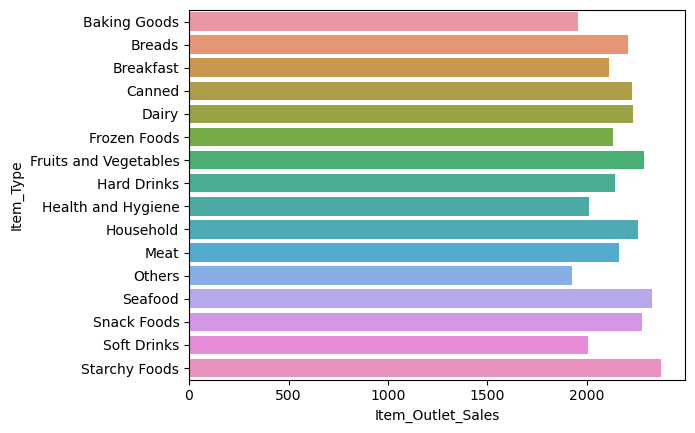

In [108]:
cts = train.groupby('Item_Type')['Item_Outlet_Sales'].mean()
cts1 = cts.reset_index()
sns.barplot(data = cts1,
           x = 'Item_Outlet_Sales',
           y = 'Item_Type')

Does outlet type influence the item sales?

In [109]:
train_ols2 = ols('Item_Outlet_Sales ~ Item_Type', data = train).fit()

In [110]:
table2 = anova_lm(train_ols2, typ = 2)
print(table)

                 sum_sq      df         F    PR(>F)
Item_Type  1.176182e+08    15.0  2.700653  0.000388
Residual   2.469965e+10  8507.0       NaN       NaN


Conclusion: Item Sales are affected by Item Type

In [111]:
cts =train.groupby('Item_Type')['Item_Outlet_Sales'].mean()
cts1 = cts.reset_index()

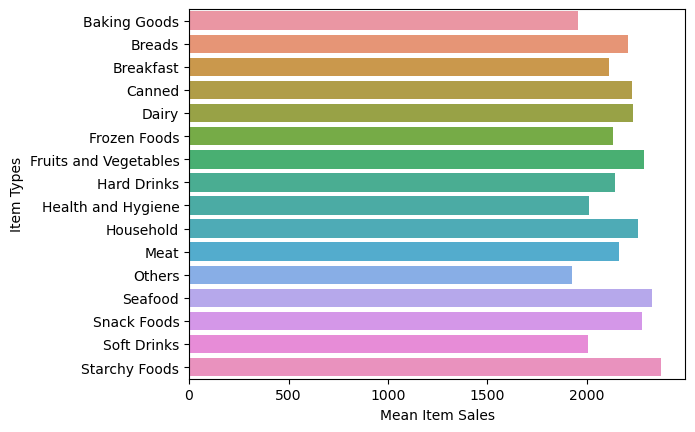

In [112]:
sns.barplot(data=cts1,
           x='Item_Outlet_Sales',
           y='Item_Type')
plt.xlabel("Mean Item Sales")
plt.ylabel("Item Types")
plt.show()

### Does fat content affect Sales?

In [113]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [114]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [115]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'low fat': 'Low Fat',
                                                              'LF':'Low Fat'})
# if inplace = True given it replaces in original df
print(train)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [119]:
train = train.replace(['reg'], 'Regular')
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### Does item type influence Item MRP?

In [120]:
train_ols3 = ols('Item_Type ~ Item_MRP', data = train).fit()

ValueError: endog has evaluated to an array with multiple columns that has shape (8523, 16). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).